## Importing useful Libraries

In [248]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import gaussian_kde
from gapminder import gapminder 
import squarify

## Importing Dataset

In [249]:
df=pd.read_csv("NutriCook1.csv",index_col=0)

In [250]:
df.reset_index(drop='Unnamed: 0.1',inplace=True)


In [252]:
#df.drop('Unnamed: 0.1',axis=1,inplace=True)

In [255]:
df

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.2,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.0,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.0,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.5,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.5,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.5,1.50,4.00,30,5.00
1096,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.5,3.50,1.00,20,5.00
1097,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.0,2.00,2.00,5,5.00
1098,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.0,1.00,1.00,30,5.00


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recipe_Name  1349 non-null   object 
 1   Type         1349 non-null   object 
 2   Protein      1349 non-null   float64
 3   Fat          1349 non-null   float64
 4   Carbs        1349 non-null   float64
 5   Calories     1349 non-null   float64
 6   cholesterol  1349 non-null   float64
 7   sodium       1349 non-null   float64
 8   fiber        1349 non-null   float64
 9   sugar        1349 non-null   float64
 10  Total_Time   1349 non-null   int64  
 11  Ratings      1349 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 126.6+ KB


### Distribution of Total time among Type of Recipes
- using bar graph

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_17740\402149344.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type', y='Total_Time', data=df,ci=None)


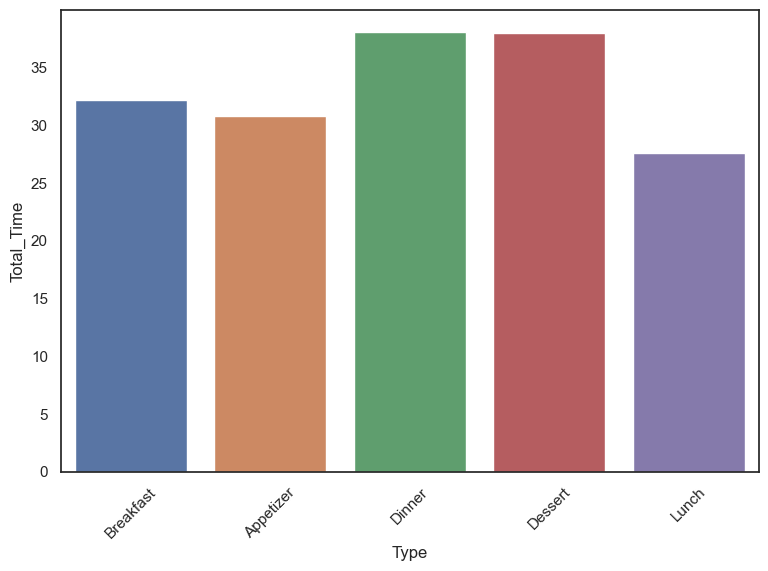

In [259]:
sns.barplot(x='Type', y='Total_Time', data=df,ci=None)
plt.xticks(rotation = 45)
plt.show()

### How does the Toal time vary across different recipe types?
- boxplot

<Axes: xlabel='Type', ylabel='Total_Time'>

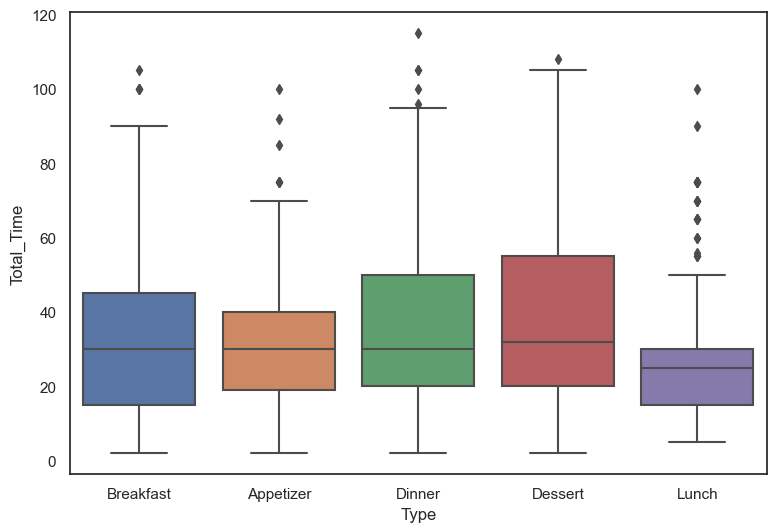

In [260]:
sns.boxplot(x = df["Type"],
            y = df["Total_Time"])

### Which nutritional component contributes the most calories to type of recipes
- barplot

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_17740\1274143139.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Calories', x='Type', data=df,ci=None)


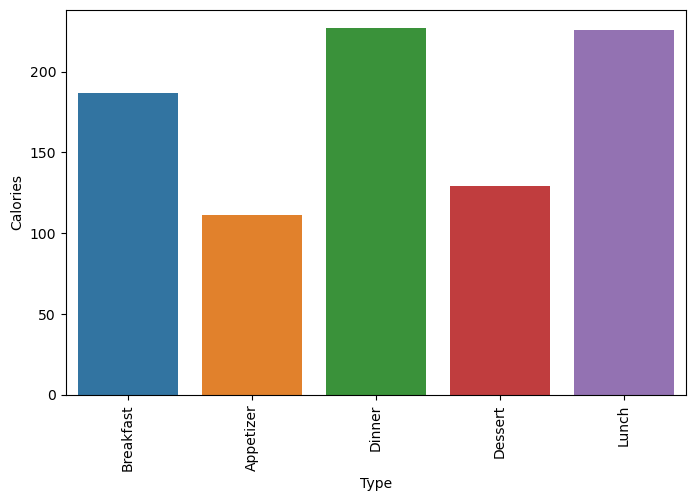

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(y='Calories', x='Type', data=df,ci=None)
plt.xticks(rotation = 90)
plt.show()

C:\Users\SHIVA SHRAYA\AppData\Local\Temp\ipykernel_17740\1463722021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

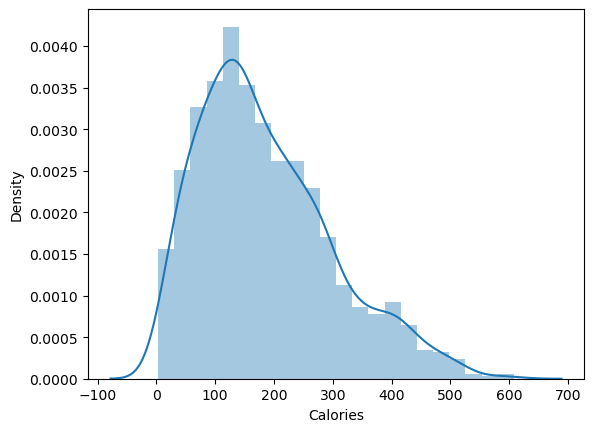

In [8]:
sns.distplot(df['Calories'])

C:\Users\SHIVA SHRAYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


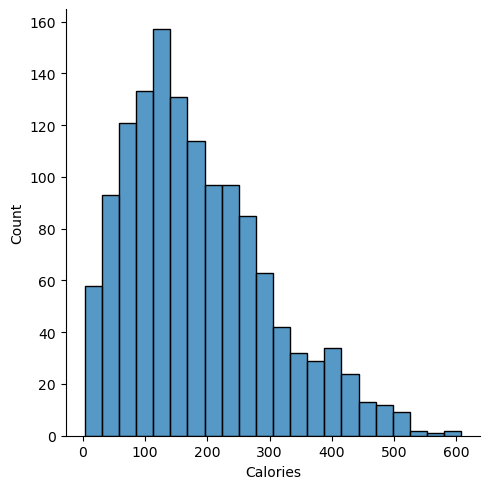

In [9]:
sns.displot(df['Calories'])

### Finding value count for type of receipes
- pie chart

In [10]:
a = pd.DataFrame(df["Type"].value_counts())
a

,count
Type,
Dinner,376
Breakfast,288
Lunch,280
Appetizer,217
Dessert,188


In [11]:
a.index

Index(['Dinner', 'Breakfast', 'Lunch', 'Appetizer', 'Dessert'], dtype='object', name='Type')

<Axes: ylabel='count'>

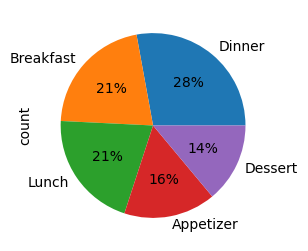

In [12]:
plt.figure(figsize=(4-1,4-1))
df["Type"].value_counts().plot.pie(autopct="%.0f%%")

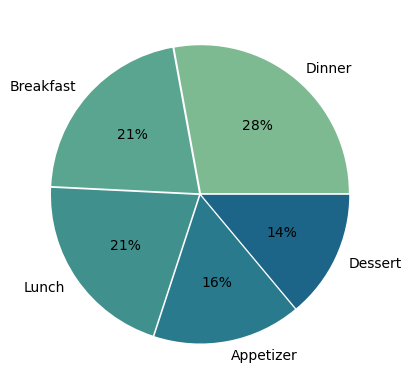

In [13]:
colors = sns.color_palette("crest")
plt.pie(df["Type"].value_counts(), labels = a.index,explode=[0.01,0.01,0.01,0.01,0.01],colors=colors,autopct='%.0f%%')
plt.show()

<Axes: ylabel='Protein'>

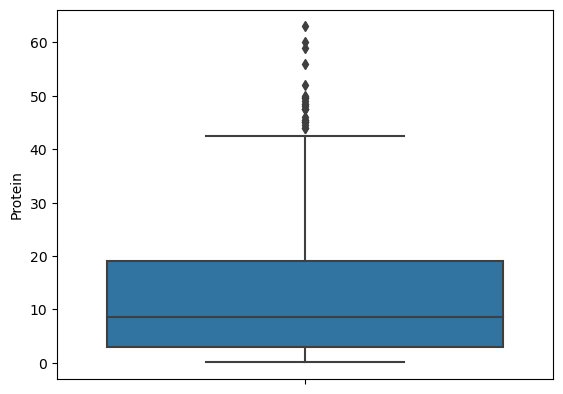

In [14]:
sns.boxplot(y = df["Protein"])

<Axes: xlabel='Type', ylabel='sugar'>

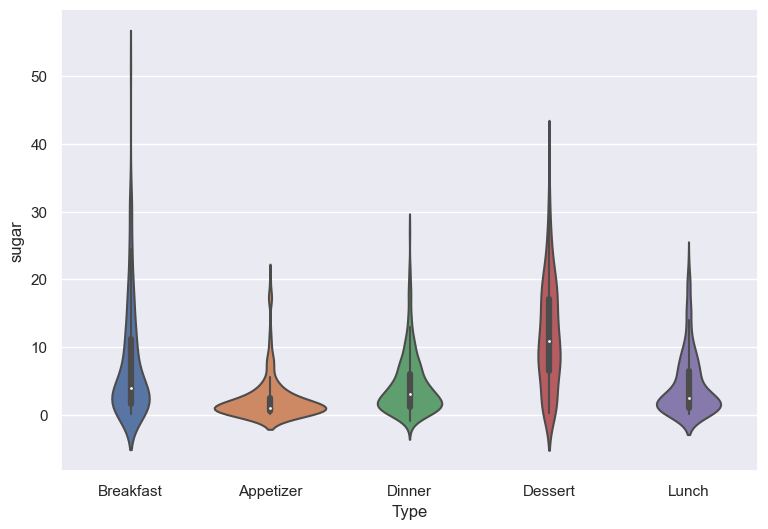

In [214]:
sns.violinplot(x=df["Type"], y=df['sugar'])

In [196]:
df.columns

Index(['Recipe_Name', 'Type', 'Protein', 'Fat', 'Carbs', 'Calories',
       'cholesterol', 'sodium', 'fiber', 'sugar', 'Total_Time', 'Ratings'],
      dtype='object')

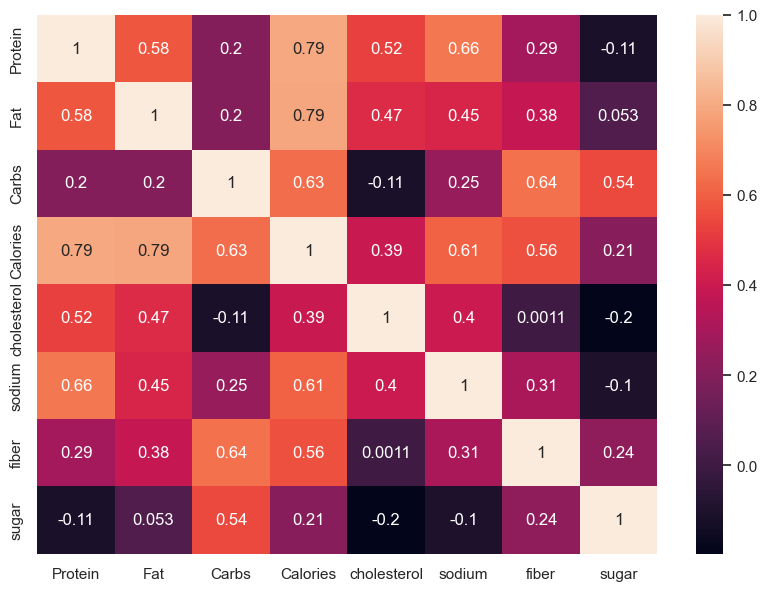

In [200]:
plt.figure(figsize=(10,7))
sns.heatmap(df[['Protein','Fat','Carbs','Calories','cholesterol','sodium','fiber','sugar']].corr(), annot=True)
plt.show()

In [75]:
df.columns

Index(['Recipe_Name', 'Type', 'Protein', 'Fat', 'Carbs', 'Calories',
       'cholesterol', 'sodium', 'fiber', 'sugar', 'Total_Time', 'Ratings'],
      dtype='object')

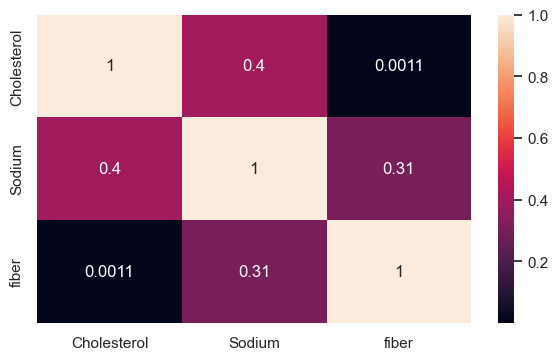

In [47]:
plt.figure(figsize=(7,4))
sns.heatmap(df[['Cholesterol','Sodium','fiber']].corr(), annot=True,)
plt.show(

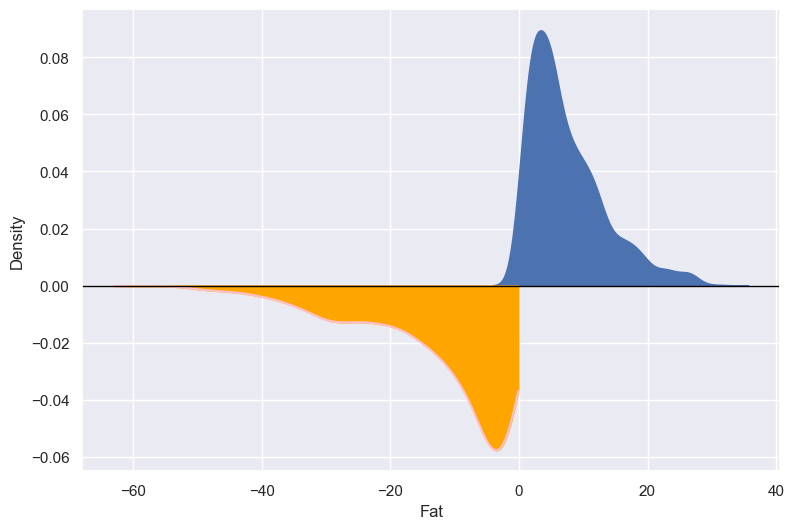

In [209]:



# Set figure size
plt.rcParams["figure.figsize"] = (9, 6)

# Plot density chart for Ratings
sns.kdeplot(data=df, x="Fat", fill=True, alpha=1)

# Plot density chart for potien
kde = gaussian_kde(df['Protein'])
x_range = np.linspace(min(df['Protein']), max(df['Protein']), len(df['Protein']))

# Multiply by -1 to reverse axis (mirror plot)
sns.lineplot(x=x_range * -1, y=kde(x_range) * -1, color='pink')
plt.fill_between(x_range * -1, kde(x_range) * -1, color='orange')


# Add horizontal line at y=0
plt.axhline(y=0, linestyle='-', linewidth=1, color='black')

# Show the plot
plt.show()


<Axes: xlabel='Protein', ylabel='Fat'>

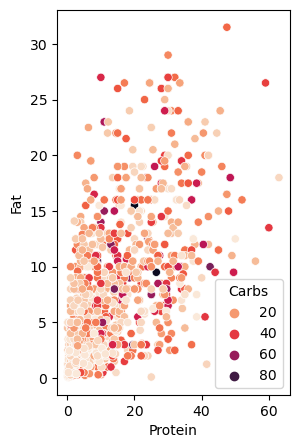

In [20]:
plt.figure(figsize=(3,5))
sns.scatterplot(data=df, x='Protein', y='Fat', hue='Carbs', palette='rocket_r')


<Axes: xlabel='Carbs', ylabel='Fat'>

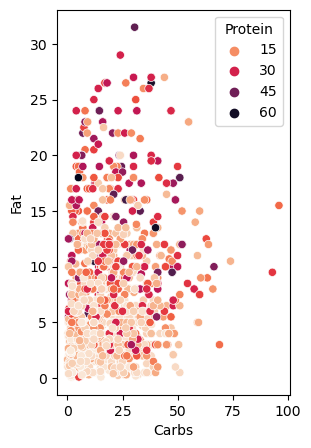

In [21]:
plt.figure(figsize=(3,5))
sns.scatterplot(data=df, x='Carbs', y='Fat', hue='Protein', palette='rocket_r')


<Axes: xlabel='Protein', ylabel='Carbs'>

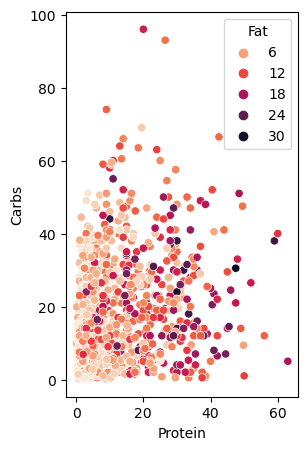

In [22]:
plt.figure(figsize=(3,5))
sns.scatterplot(data=df, x='Protein', y='Carbs', hue='Fat', palette='rocket_r')


<Axes: xlabel='fiber', ylabel='Count'>

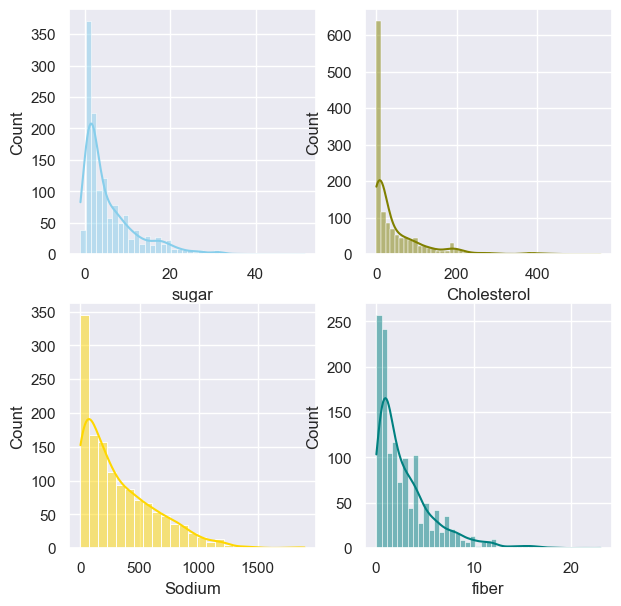

In [23]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.histplot(data=df, x="sugar", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Cholesterol", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Sodium", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="fiber", kde=True, color="teal", ax=axs[1, 1])

<Axes: xlabel='Calories', ylabel='Count'>

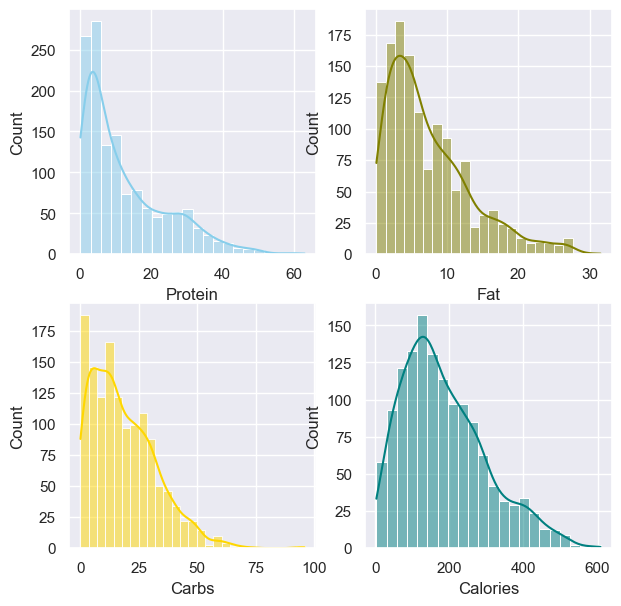

In [46]:
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df, x="Protein", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Fat", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Carbs", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df, x="Calories", kde=True, color="teal", ax=axs[1, 1])

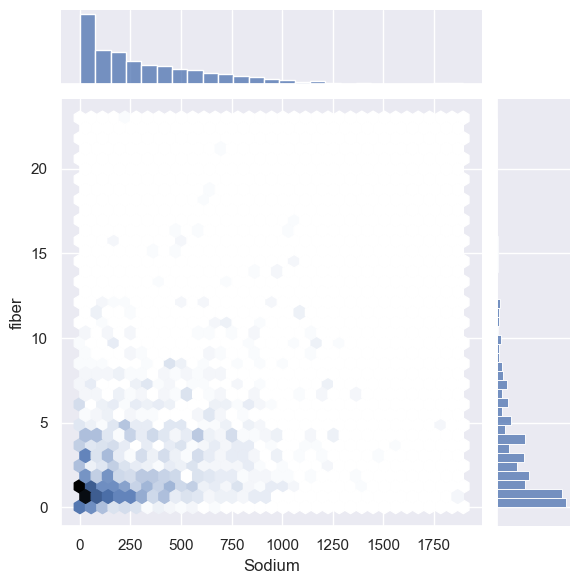

In [25]:
sns.jointplot(x=df["Sodium"], y=df["fiber"], kind='hex')
plt.show()

C:\Users\SHIVA SHRAYA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


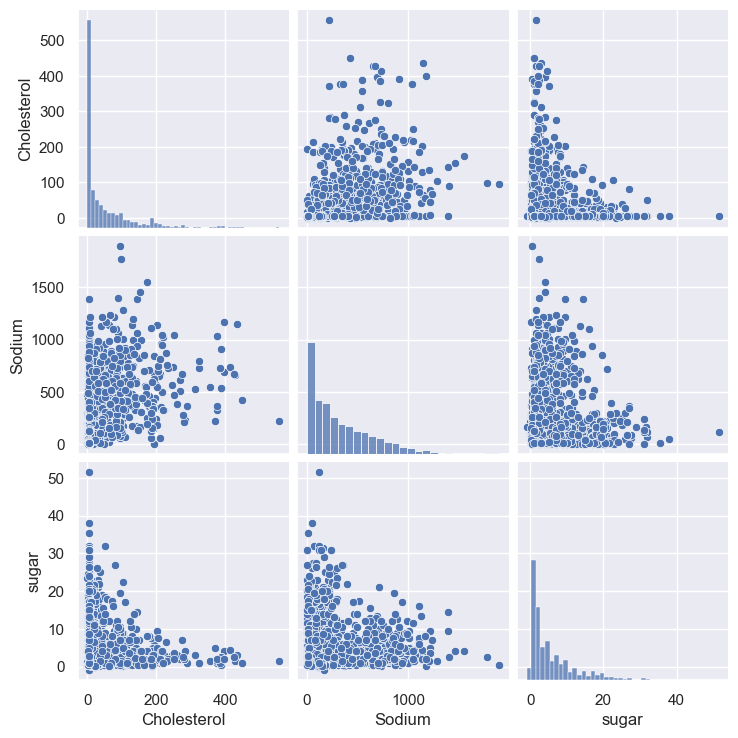

In [27]:
sns.pairplot(data=df,vars=['Cholesterol','Sodium','sugar'])

In [28]:
df['Protein'].unique()

array([ 4.25,  3.15, 20.  ,  9.  , 14.5 , 10.  ,  4.  , 28.5 ,  5.5 ,
        7.  , 22.5 , 22.  ,  8.  ,  2.1 ,  6.  ,  1.5 ,  9.5 ,  1.  ,
        3.  ,  5.  ,  8.75,  3.5 , 21.5 , 18.5 , 13.9 , 12.5 ,  6.5 ,
       18.  , 15.  , 24.  , 24.3 , 21.  , 31.  , 25.5 , 12.  ,  2.7 ,
       16.  , 29.  , 16.5 , 19.  , 11.  ,  2.  , 17.5 , 46.  , 11.5 ,
        4.5 , 11.25,  0.42, 25.  , 10.5 ,  0.5 ,  4.3 ,  3.1 , 13.  ,
       28.  ,  4.75, 13.5 ,  5.25,  2.5 , 14.  , 19.5 ,  0.25, 15.5 ,
       17.  ,  7.5 ,  3.25,  8.1 , 26.5 ,  3.38, 20.5 ,  3.33,  0.75,
       36.  , 30.  , 33.  , 14.33, 41.5 , 32.  , 38.5 ,  4.67, 30.5 ,
        9.25, 37.  , 24.5 , 27.5 , 45.  , 10.17, 34.  , 13.25, 16.75,
       29.6 ,  6.25, 48.5 ,  2.44, 42.  , 26.  , 49.5 ,  8.5 , 23.5 ,
       40.5 , 47.5 , 22.2 , 37.5 , 44.  , 15.17,  6.75, 13.7 ,  2.57,
       27.  , 32.5 , 31.5 , 45.5 ,  2.83, 23.  , 11.75, 35.  ,  6.88,
       24.25, 39.  , 33.5 ,  6.38, 41.  , 44.5 , 48.  , 31.75, 34.5 ,
        6.83, 49.  ,

In [171]:
df['Carbs'].max()

96.0

In [148]:
df['Calories'].min()

3.0

In [261]:
a = pd.cut(df["Protein"], bins= [0,3,5,10,20,64], labels=['Faint','Mild', 'Moderate',  'High',  'Intense']).value_counts()
b = pd.cut(df["Fat"], bins= [0,3,5,10,20,30], labels=['Faint','Mild', 'Moderate',  'High',  'Intense']).value_counts()
c = pd.cut(df["Carbs"], bins= [0,3,10,20,30,97], labels=['Faint','Mild', 'Moderate',  'High',  'Intense']).value_counts()
d = pd.cut(df["Calories"], bins= [3,100,150,250,300,608], labels=['Faint','Mild', 'Moderate',  'High',  'Intense']).value_counts()



#Intense fat, high fat, moderate fat, mild fat, faint fat

In [262]:
a,b,c,d

(Protein
 Faint       309
 Intense     234
 Moderate    212
 High        202
 Mild        143
 Name: count, dtype: int64,
 Fat
 Faint       330
 Moderate    289
 High        224
 Mild        220
 Intense      36
 Name: count, dtype: int64,
 Carbs
 Moderate    298
 Mild        239
 High        226
 Intense     199
 Faint       138
 Name: count, dtype: int64,
 Calories
 Faint       304
 Moderate    301
 Mild        230
 Intense     156
 High        108
 Name: count, dtype: int64)

In [263]:
dff = pd.concat([a, b, c, d], axis=1)
dff.columns = ['Protein', 'Fat', 'Carbs', 'Calories']  # Set column names
dff = dff.loc[['Faint', 'Mild', 'Moderate', 'High', 'Intense']]

dff#counts of observations categorized into different levels for each macronutrients

,Protein,Fat,Carbs,Calories
Faint,309,330,138,304
Mild,143,220,239,230
Moderate,212,289,298,301
High,202,224,226,108
Intense,234,36,199,156


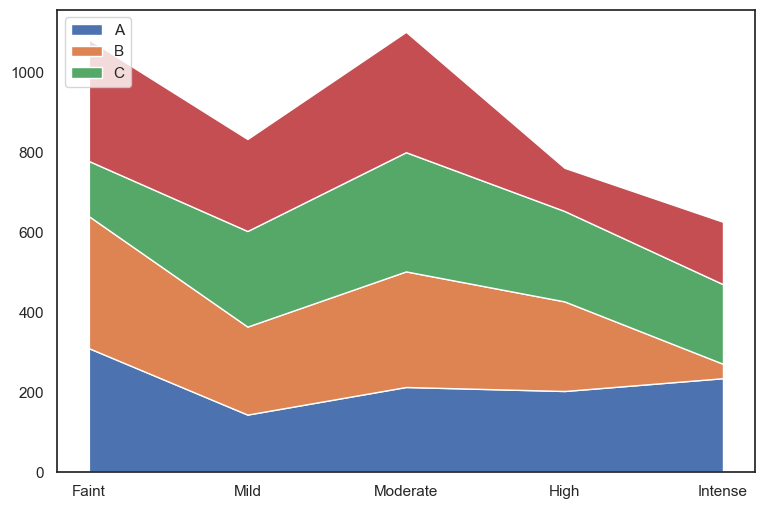

In [264]:
plt.stackplot(dff.index,dff['Protein'], dff['Fat'], dff['Carbs'],dff['Calories'],labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

In [127]:
dff.columns

Index(['Protein', 'Fat', 'Carbs', 'Calories'], dtype='object')

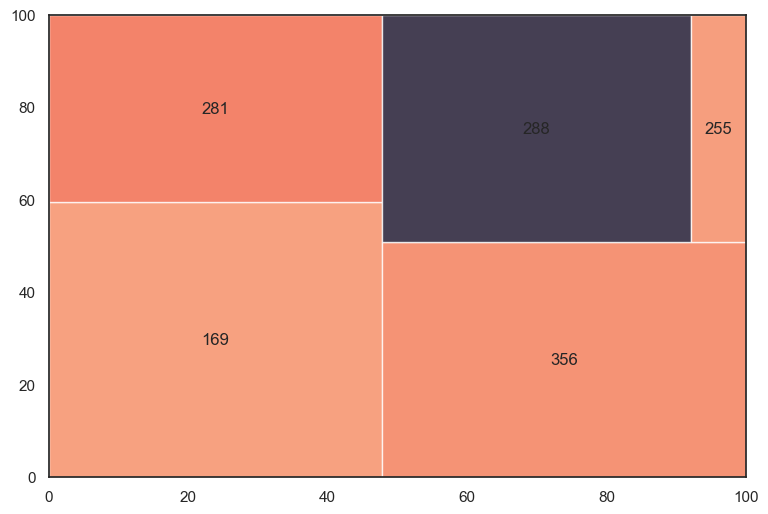

In [226]:
squarify.plot(sizes=dff['Fat'], label=dff['Carbs'], alpha=.8 )
plt.show()

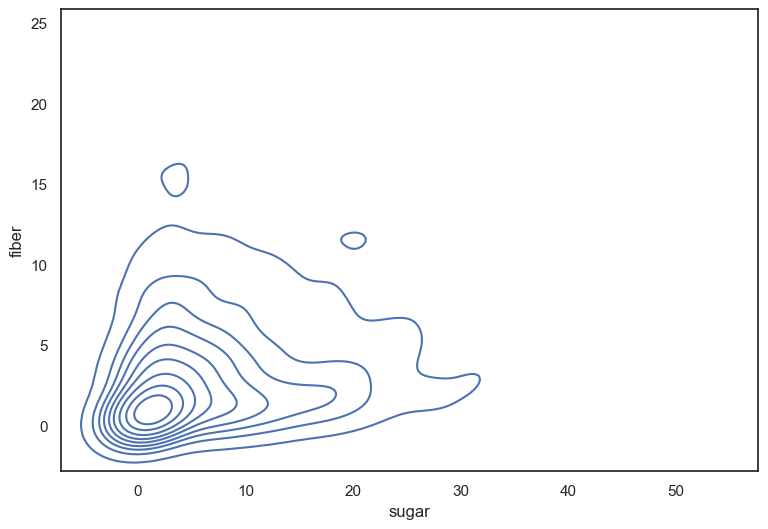

In [265]:
sns.set_style("white")
sns.kdeplot(x=df['sugar'], y=df['fiber'])
plt.show()


In [230]:
df.columns

Index(['Recipe_Name', 'Type', 'Protein', 'Fat', 'Carbs', 'Calories',
       'cholesterol', 'sodium', 'fiber', 'sugar', 'Total_Time', 'Ratings'],
      dtype='object')

In [266]:
df

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.2,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.0,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.0,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.5,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.5,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.5,1.50,4.00,30,5.00
1096,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.5,3.50,1.00,20,5.00
1097,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.0,2.00,2.00,5,5.00
1098,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.0,1.00,1.00,30,5.00


In [267]:
df[(df['Protein'] > 17) & (df['Protein'] < 58) & (df['Type'] == 'Breakfast')&(df['Carbs']>30)]

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
8,Carrot Banana Protein Smoothie,Breakfast,28.5,6.5,34.0,294.0,5.0,290.5,7.0,17.5,5,4.84
38,Tropical Chia Pudding Breakfast Bowl (High Pro...,Breakfast,18.0,13.0,35.0,305.0,7.0,110.0,12.0,19.0,12,4.95
41,Zoats or Zucchini Oats,Breakfast,24.0,12.5,63.0,441.0,5.0,207.0,12.0,18.0,10,4.69
80,Banana Nut Protein Oats,Breakfast,18.5,9.0,63.5,388.0,9.5,203.0,6.5,23.0,10,4.84
230,Turkey Burger Recipe,Breakfast,29.0,12.0,33.5,351.0,84.0,768.5,2.0,8.5,25,4.91
248,Teriyaki Shrimp Quinoa Bowls with Mango-Cucumb...,Breakfast,24.0,10.0,44.5,352.0,143.0,1389.0,6.5,14.5,40,5.00
878,The Best Lasagna Recipe,Breakfast,37.0,11.5,36.5,394.0,107.5,840.0,3.5,7.0,105,4.80


In [268]:
df[(df['Protein'] > 17) & (df['Protein'] < 58) & (df['Type'] == 'Lunch')&(df['Carbs']>30)]

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
207,Korean-Inspired Salmon Rice Bowl,Lunch,33.0,10.00,50.0,431.0,78.0,416.0,1.0,6.0,21,4.92
222,Air Fryer Asian Meatballs,Lunch,37.0,16.00,49.0,483.0,130.0,736.0,11.0,3.0,40,4.75
243,"Honey Sriracha Roasted Salmon Rice Bowls (GF, DF)",Lunch,38.5,17.50,48.0,506.0,93.5,489.0,5.0,10.5,30,4.92
246,5-Minute Microwave Salmon Rice Bowl with Bok Choy,Lunch,48.5,18.00,51.0,533.0,93.5,856.0,10.0,19.5,6,5.00
256,Buffalo Chicken Rice Bowls,Lunch,49.5,9.50,47.5,485.0,134.0,1200.0,7.0,1.5,30,4.86
280,Grilled Chicken Chickpea Salad,Lunch,34.0,19.50,41.0,462.0,73.5,1103.0,11.5,16.0,5,5.00
285,Honey Sriracha Chicken and Broccoli Meal Prep ...,Lunch,44.0,9.50,41.0,428.0,124.0,570.0,4.0,12.0,30,4.69
293,Spicy Canned Salmon Rice Bowl,Lunch,25.0,14.00,39.0,389.0,65.0,757.0,4.0,4.0,5,4.89
303,Roasted Sweet Potato Black Bean Bowls,Lunch,20.0,15.50,96.0,585.0,1.5,695.0,21.0,13.5,75,4.93
312,Leftover Turkey Harvest Cobb Salad,Lunch,28.0,26.00,37.0,466.0,50.0,660.0,9.0,9.0,30,5.00


In [269]:
df[ (df['Protein'] < 58) & (df['Type'] == 'Appetizer')&(df['Carbs']>30)]

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
244,"Loaded Nachos with Ground Turkey, Beans and Ch...",Appetizer,28.0,17.5,45.0,386.0,32.0,990.0,1.5,8.5,25,4.96
258,"Veggie Stromboli with Mushroom, Spinach and Mo...",Appetizer,11.0,6.0,31.5,217.5,7.5,519.5,1.5,3.5,55,5.00
320,Sausage and Pepper Stromboli (Stuffed Sausage ...,Appetizer,12.5,5.5,43.5,272.0,20.5,671.0,1.5,1.0,2,5.00
732,Baked Seasoned Fries with Skinny Garlic Aioli,Appetizer,3.5,5.3,36.1,198.0,5.0,22.1,4.0,1.0,30,5.00
751,Baked Tostones,Appetizer,1.1,4.8,38.2,184.0,5.0,6.6,2.7,17.5,45,3.67


In [270]:
df[(df['Protein'] > 17) & (df['Protein'] < 58) & (df['Type'] == 'Dinner')&(df['Carbs']>30)]

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
205,Chicken Pot Pie Soup,Dinner,30.0,3.5,32.0,268.0,64.0,983.0,4.0,12.0,45,4.75
212,White Bean Pumpkin Turkey Chili (Slow Cooker o...,Dinner,32.0,2.5,31.0,272.5,5.0,499.0,12.0,2.5,9,4.58
214,Autumn Kale Salad with Chicken,Dinner,30.0,27.0,38.0,504.0,70.5,514.5,8.5,17.5,45,5.00
239,Baked Shrimp Parmesan Hero,Dinner,29.6,8.0,57.5,433.0,5.0,559.0,2.5,1.0,30,4.88
240,Tofu Poke Bowl,Dinner,29.0,24.0,47.0,520.0,5.0,956.0,12.0,5.0,50,4.74
267,Air Fryer Salmon Fish Sandwich,Dinner,33.0,24.0,31.5,493.0,77.5,824.5,3.5,4.0,15,4.84
268,Chicken Taco Poblano Rice Bowls,Dinner,40.5,12.0,52.0,475.0,116.0,407.5,6.0,3.5,25,4.96
269,Creamy Sausage and Potato Soup,Dinner,25.0,7.5,60.0,402.0,55.0,1164.0,9.5,8.0,55,4.94
271,"Grilled Chicken Panini with Zucchini, Tomato, ...",Dinner,36.0,17.5,33.5,433.0,109.5,899.0,2.0,4.0,30,4.91
332,Air Fryer Chicken Sandwich with Sriracha Mayo,Dinner,35.0,8.0,31.0,334.0,100.0,796.0,6.0,7.0,39,4.67


In [245]:
df

,Recipe_Name,Type,Protein,Fat,Carbs,Calories,cholesterol,sodium,fiber,sugar,Total_Time,Ratings
0,Protein Waffles,Breakfast,4.25,2.25,6.0,60.5,40.5,112.2,0.75,0.75,15,4.90
1,Deviled Eggs,Appetizer,3.15,3.75,0.5,48.4,93.5,78.0,0.50,0.15,25,4.78
2,Crustless Quiche,Dinner,20.00,12.50,5.0,215.0,193.0,620.0,1.00,2.50,55,4.88
3,Spanish Tortilla with Pimenton Aioli,Appetizer,9.00,14.50,21.5,247.0,188.0,363.5,2.00,2.50,75,4.44
4,Corned Beef Hash,Breakfast,14.50,16.00,26.0,300.0,62.5,782.5,3.50,6.50,25,4.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Pan Seared Scallops with Baby Greens and Citru...,Lunch,20.50,9.50,8.5,212.0,42.5,206.5,1.50,4.00,30,5.00
1345,Broccoli and Cauliflower Salad with Capers in ...,Lunch,3.20,7.00,7.6,97.0,5.0,121.5,3.50,1.00,20,5.00
1346,Autumn Salad with Pears and Gorgonzola,Lunch,4.50,12.50,10.5,160.5,5.0,10.0,2.00,2.00,5,5.00
1347,Grilled Zucchini and Tomato Salad – 0 pts,Lunch,3.00,5.00,12.0,122.0,5.0,10.0,1.00,1.00,30,5.00
